In [1]:
!pip install tensorflow==2.9.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 KB 47.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.1.21
    Uninstalling flatbuffers-23.1.21:
      Successfully uninstalled flatbuffers-23.1.21
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully u

In [2]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [3]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O cats_and_dogs_filtered.zip

--2023-02-17 16:50:59--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 142.251.18.128, 142.250.153.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  29.7MB/s    in 2.2s    

2023-02-17 16:51:02 (29.7 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
! unzip cats_and_dogs_filtered.zip

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2117.

In [5]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [6]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="cats_and_dogs_filtered/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="cats_and_dogs_filtered/validation", target_size=(224,224))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(input_shape=(224,224,3), filters=64, kernel_size=(3,3), padding="same", activation="relu"))

In [11]:
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))

In [12]:
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

In [13]:
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

In [14]:
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

In [15]:
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

In [16]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

In [17]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

In [18]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

In [19]:
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

In [20]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [21]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [22]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [23]:
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

In [24]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [25]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [26]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

In [27]:
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

In [28]:
model.add(Flatten())

In [29]:
model.add(Dense(units=4096, activation="relu"))

In [30]:
model.add(Dense(units=4096, activation="relu"))

In [31]:
model.add(Dense(units=2, activation="softmax"))

In [32]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 128)     147584    
                                                        

In [34]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [35]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('cats_and_dogs_filtered/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2000 images belonging to 2 classes.


In [36]:
test_set = test_datagen.flow_from_directory('cats_and_dogs_filtered/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1000 images belonging to 2 classes.


In [37]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
63/63 [==============================] - 64s 777ms/step - loss: 0.7279 - accuracy: 0.5060 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 45s 713ms/step - loss: 0.6934 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
63/63 [==============================] - 45s 713ms/step - loss: 0.6934 - accuracy: 0.4960 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
63/63 [==============================] - 44s 694ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
63/63 [==============================] - 44s 697ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
63/63 [==============================] - 45s 717ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
63/63 [==============================] - 45s 713ms/step - loss: 0.6932 - accuracy: 0.4830 - val_loss: 0.6931 - val_accuracy: 0.5000

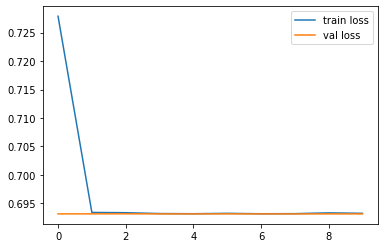

<Figure size 432x288 with 0 Axes>

In [38]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

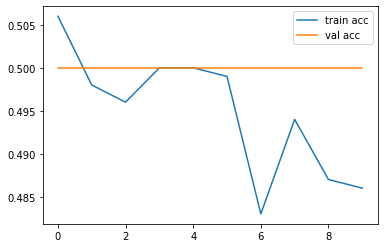

<Figure size 432x288 with 0 Axes>

In [39]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [40]:
y_pred = model.predict(test_set)

32/32 [==============================] - 6s 176ms/step


In [41]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [42]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [53]:
from tensorflow.keras.preprocessing import image

img=image.load_img('cat.jpg',target_size=(224,224))

In [54]:
x=image.img_to_array(img)
x

array([[[173., 156.,  42.],
        [176., 156.,  41.],
        [176., 156.,  41.],
        ...,
        [148., 137., 105.],
        [142., 132.,  97.],
        [133., 120.,  86.]],

       [[174., 157.,  43.],
        [177., 157.,  42.],
        [176., 156.,  41.],
        ...,
        [154., 143., 111.],
        [149., 138., 106.],
        [140., 127.,  93.]],

       [[174., 157.,  43.],
        [177., 157.,  42.],
        [177., 157.,  42.],
        ...,
        [159., 150., 119.],
        [155., 144., 112.],
        [145., 134., 102.]],

       ...,

       [[ 32.,  96.,  22.],
        [ 40., 104.,  28.],
        [ 59., 123.,  45.],
        ...,
        [ 15.,  77.,   0.],
        [ 20.,  82.,   5.],
        [ 34.,  96.,  19.]],

       [[ 36., 100.,  26.],
        [ 18.,  82.,   6.],
        [ 21.,  85.,   7.],
        ...,
        [ 36.,  98.,  23.],
        [ 41., 103.,  28.],
        [ 52., 114.,  39.]],

       [[ 29.,  93.,  19.],
        [  7.,  71.,   0.],
        [ 12.,  

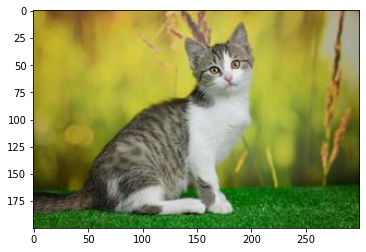

In [55]:
Z = plt.imread('cat.jpg')
plt.imshow(Z)

In [56]:
x.shape

(224, 224, 3)

In [57]:
x=x/255

In [58]:
from keras.applications.vgg16 import preprocess_input

In [59]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [60]:
model.predict(img_data)

1/1 [==============================] - 0s 29ms/step


array([[0.47386372, 0.5261363 ]], dtype=float32)

In [61]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 20ms/step


In [64]:
a[0]

1

In [65]:
animal = [
    "cats",
    "dogs"
]

In [66]:
animal[a[0]]

'dogs'